## The basic process

1. Draw a line through the plot
2. calculate the distance of each point form the line, square the distance and add them
3. rotate the line a little bit (learning rate)
4. go to step 2 until end of epoch or worsening error with any change.

## Mathematical process

In two dimensions, the equation will be $y = m.x + b$, the tunable parameters are m and b
<br>
$m \implies weight (slope)$
<br>
$b \implies bias(y-intercept)$

Error to minimize: Mean Squared Error

$$E = \frac{1}{n} \times \sum_0^n{(y_{i}} - ({m.x_{i} + b))^2}$$
Here n is the sample size.

Now we to adjust `m` and `b` we find the partial derivative of E wrt to `m` and `b` 

Therefore, 

$$\frac{\partial E}{\partial m} = \frac{-2}{n} \times \sum_0^n (y_i - (m.x_i + b))\times (x_i)$$
and,
$$\frac{\partial E}{\partial b} = \frac{-2}{n} \times \sum_0^n (y_i - (m.x_i + b))$$

Now, we change `m` and `b` in the following way :-

$m = m - \alpha \times \frac{\partial E}{\partial m}$
<br>
$b = b - \alpha \times \frac{\partial E}{\partial b}$



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [14]:
class LinearRegression:
    def __init__(self, lr=0.001, epoch = 1000):
        self.alpha = lr
        self.epoch = epoch
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epoch):
            y_pred = np.dot(X, self.weights) + self.bias
            loss = y_pred - y

            dE_dw = (2/n_samples) * np.dot(X.T, (loss))
            dE_db = (2/n_samples) * np.sum(loss)

            self.weights -= self.alpha * dE_dw
            self.bias -= self.alpha * dE_db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    

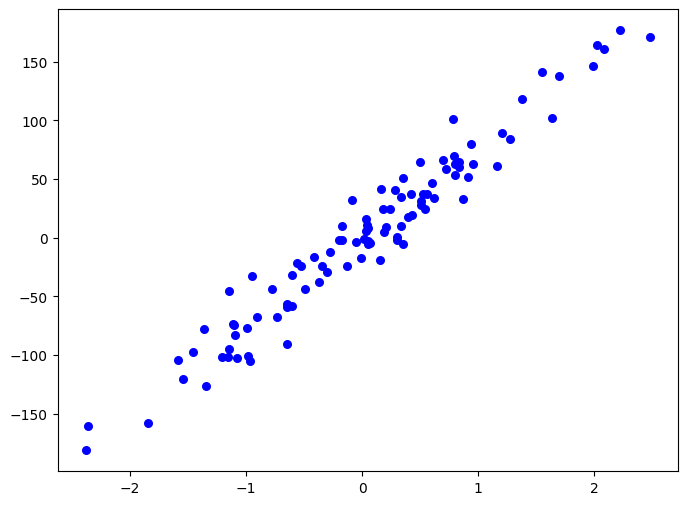

In [15]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color='b', marker='o', s = 30)
plt.show()

In [16]:
reg = LinearRegression(lr=000.1)

reg.fit(X_train, y_train)
pred = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test - predictions)**2)

mse = mse(y_test, pred)
print(mse)

305.77413162286416


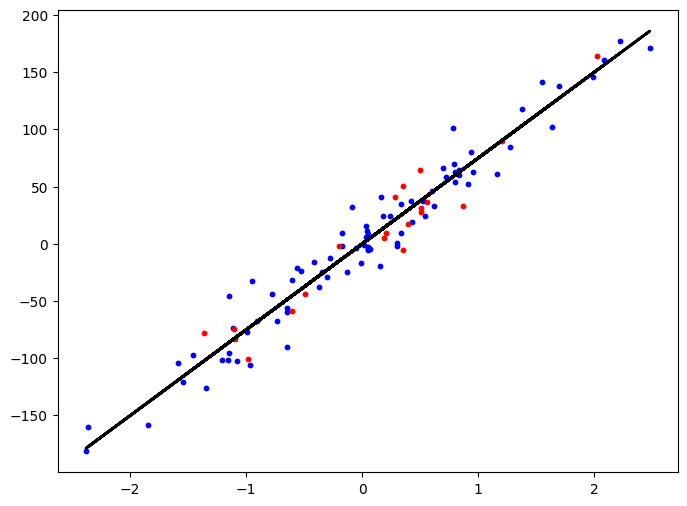

In [25]:
y_pred_line = reg.predict(X)


fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color='blue', s=10)
m2 = plt.scatter(X_test, y_test, color='red', s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2)
plt.show()